# Assignment 1

### Data Visualization with Haberman Dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.



## Haberman Survival Data Set

Following are the meaning behind each column name
* Age - Age of patient at time of operation 
* Op_Year - Patient's year of operation
* axil_nodes - Number of positive axillary nodes detected
* Surv_status - Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

Reference - https://www.kaggle.com/gilsousa/habermans-survival-data-set

**Objective** : To analyse the data/dataset and determine survival rate of patient based on provided data.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Creating dataframe with column headers

haberman = pd.read_csv("haberman.csv",names = ["Age", "Op_Year", "axil_nodes", "Surv_status"])

In [3]:
print(haberman.shape)

(306, 4)


In [4]:
print(haberman.columns)

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')


In [5]:
# Checking if any values in dataframe are null

haberman.isnull().values.any()

False

In [6]:
haberman["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

# 2-D Scatter Plot

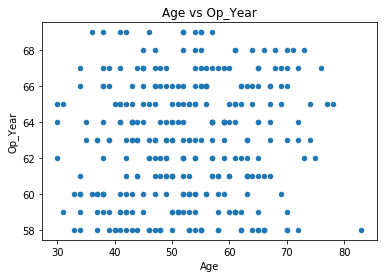

In [7]:
haberman.plot(kind='scatter', x='Age', y='Op_Year')
plt.title('Age vs Op_Year')
plt.show()

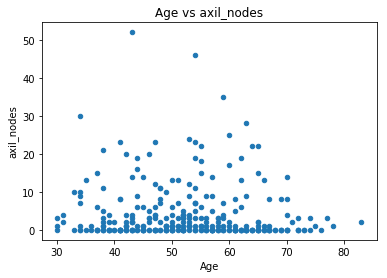

In [8]:
haberman.plot(kind='scatter', x='Age', y='axil_nodes')
plt.title('Age vs axil_nodes')
plt.show()

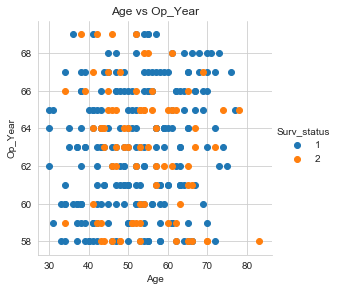

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status", height=4) \
   .map(plt.scatter, "Age", "Op_Year") \
   .add_legend();
plt.title('Age vs Op_Year')
plt.show()

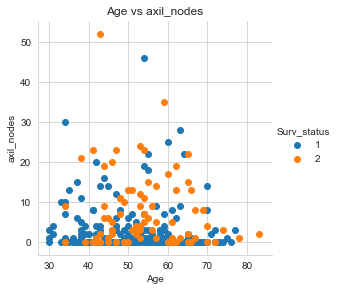

In [10]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status", height=4) \
   .map(plt.scatter, "Age", "axil_nodes") \
   .add_legend();
plt.title('Age vs axil_nodes')
plt.show();

**Observation(s):**
1. Using axil_nodes, Age, Op_Year features, we cannot distinguish or get a clear cut classification.
2. Seperating Survival status 1 with 2 using scatter plot seems tedious or not easy based on if-else condition alone.

# Pair-plot

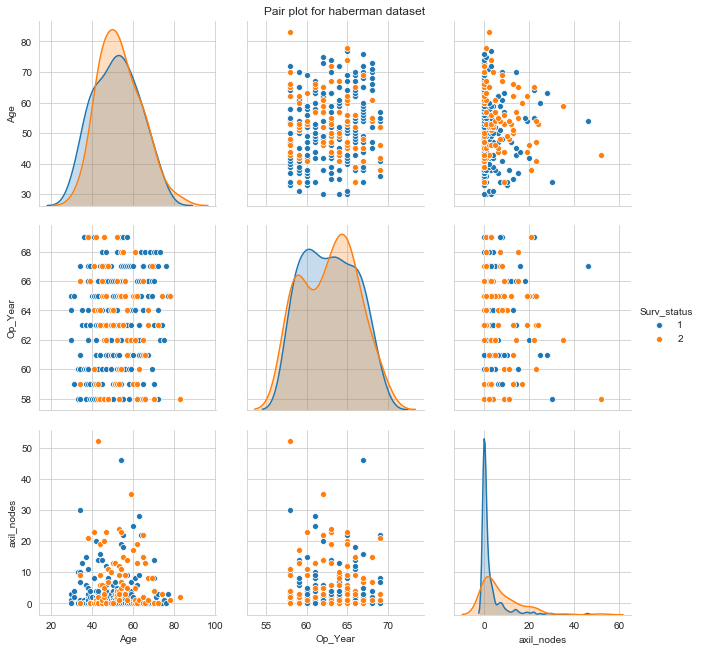

In [12]:
#Pair plots

plt.close();
sns.set_style("whitegrid");
splot = sns.pairplot(haberman, hue="Surv_status", vars=['Age','Op_Year','axil_nodes'] ,height=3);
splot.fig.suptitle("Pair plot for haberman dataset", y=1)
plt.show()



**Conclusions** :
1. From the above analysis we can see that we cannot directly determine the useful features based on above plots.
2. Age, axil_nodes are equally contributing towards Surv_status and seem to be the right features to consider.
3. Further plots may reveal an easier way to classify the survival rate.

# Histogram, PDF, CDF

In [13]:
haberman_status1 = haberman.loc[haberman["Surv_status"] == 1];
haberman_status2 = haberman.loc[haberman["Surv_status"] == 2];

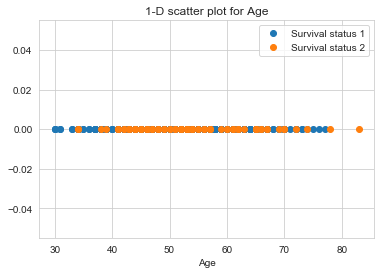

In [14]:
plt.plot(haberman_status1["Age"], np.zeros_like(haberman_status1['Age']), 'o', label = 'Survival status 1')
plt.plot(haberman_status2["Age"], np.zeros_like(haberman_status2['Age']), 'o', label = 'Survival status 2')
plt.legend()
plt.xlabel('Age')
plt.title('1-D scatter plot for Age')
plt.show()

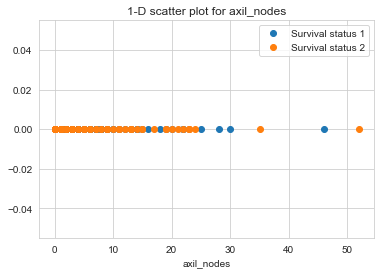

In [15]:
plt.plot(haberman_status1["axil_nodes"], np.zeros_like(haberman_status1['axil_nodes']), 'o', label = 'Survival status 1')
plt.plot(haberman_status2["axil_nodes"], np.zeros_like(haberman_status2['axil_nodes']), 'o', label = 'Survival status 2')
plt.legend()
plt.xlabel('axil_nodes')
plt.title('1-D scatter plot for axil_nodes')
plt.show()

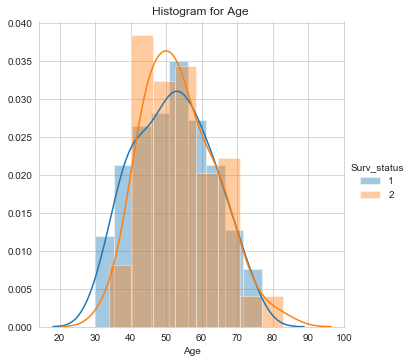

In [16]:
splot = sns.FacetGrid(haberman, hue="Surv_status", height=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
splot.fig.suptitle("Histogram for Age", y=1)
plt.show();

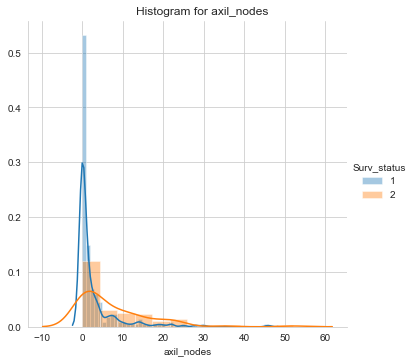

In [17]:
splot = sns.FacetGrid(haberman, hue="Surv_status", height=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
splot.fig.suptitle("Histogram for axil_nodes", y=1)
plt.show();

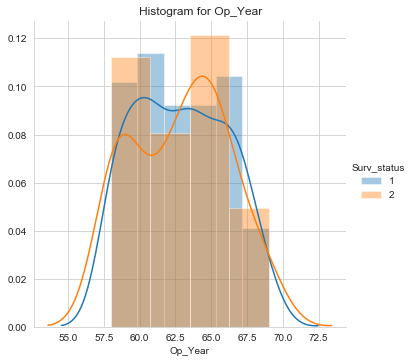

In [18]:
splot = sns.FacetGrid(haberman, hue="Surv_status", height=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
splot.fig.suptitle("Histogram for Op_Year",y=1)
plt.show();

**Conclusions** :
* From the above plots, axil_nodes seems to be more clear than Age
* Further plotting may reveal more options

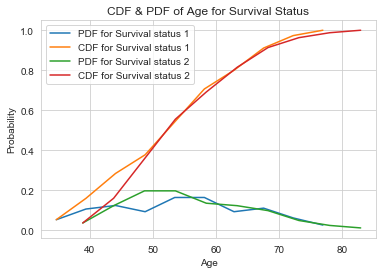

In [19]:
#Plot CDF & PDF of Age, Op_Year, axil_nodes

counts, bin_edges = np.histogram(haberman_status1['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'PDF for Survival status 1')
plt.plot(bin_edges[1:], cdf, label = 'CDF for Survival status 1')

counts, bin_edges = np.histogram(haberman_status2['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'PDF for Survival status 2')
plt.plot(bin_edges[1:], cdf, label = 'CDF for Survival status 2')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('CDF & PDF of Age for Survival Status')
plt.show();


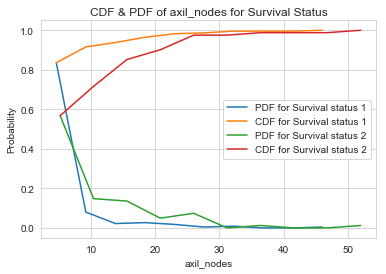

In [20]:
counts, bin_edges = np.histogram(haberman_status1['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'PDF for Survival status 1')
plt.plot(bin_edges[1:], cdf, label = 'CDF for Survival status 1')

counts, bin_edges = np.histogram(haberman_status2['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'PDF for Survival status 2')
plt.plot(bin_edges[1:], cdf, label = 'CDF for Survival status 2')
plt.legend()
plt.xlabel('axil_nodes')
plt.ylabel('Probability')
plt.title('CDF & PDF of axil_nodes for Survival Status')
plt.show();

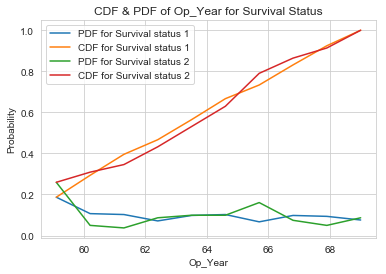

In [21]:
counts, bin_edges = np.histogram(haberman_status1['Op_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'PDF for Survival status 1')
plt.plot(bin_edges[1:], cdf, label = 'CDF for Survival status 1')

counts, bin_edges = np.histogram(haberman_status2['Op_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'PDF for Survival status 2')
plt.plot(bin_edges[1:], cdf, label = 'CDF for Survival status 2')
plt.legend()
plt.xlabel('Op_Year')
plt.ylabel('Probability')
plt.title('CDF & PDF of Op_Year for Survival Status')
plt.show();

**Conclusions** :
1. From the above analysis we can see that we cannot directly determine the useful features.
2. A simple if-else condition would not suffice to distingush the status codes.

# Mean, Variance and Std-dev

In [22]:
#Mean, Variance, Std-deviation,  
print("Means:")
print('Haberman with status1 :')
print(np.mean(haberman_status1["axil_nodes"]))
print(np.mean(haberman_status1["Age"]))
print(np.mean(haberman_status1["Op_Year"]))
print('Haberman with status2 :')
print(np.mean(haberman_status2["axil_nodes"]))
print(np.mean(haberman_status2["Age"]))
print(np.mean(haberman_status2["Op_Year"]))
print("\nStd-dev:");
print('Haberman with status1 :')
print(np.std(haberman_status1["axil_nodes"]))
print(np.std(haberman_status1["Age"]))
print(np.std(haberman_status1["Op_Year"]))
print('Haberman with status2 :')
print(np.std(haberman_status2["axil_nodes"]))
print(np.std(haberman_status2["Age"]))
print(np.std(haberman_status2["Op_Year"]))



Means:
Haberman with status1 :
2.7911111111111113
52.01777777777778
62.86222222222222
Haberman with status2 :
7.45679012345679
53.67901234567901
62.82716049382716

Std-dev:
Haberman with status1 :
5.857258449412138
10.987655475100508
3.2157452144021947
Haberman with status2 :
9.128776076761635
10.104182193031312
3.3214236255207887


# Median, Percentile, Quantile, IQR, MAD

In [23]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print('Haberman with status1 :')
print(np.median(haberman_status1["axil_nodes"]))
print(np.median(haberman_status1["Age"]))
print(np.median(haberman_status1["Op_Year"]))
print('Haberman with status2 :')
print(np.median(haberman_status2["axil_nodes"]))
print(np.median(haberman_status2["Age"]))
print(np.median(haberman_status2["Op_Year"]))


print("\nQuantiles:")
print('Haberman with status1 :')
print(np.percentile(haberman_status1["axil_nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_status1["Age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_status1["Op_Year"],np.arange(0, 100, 25)))
print('Haberman with status2 :')
print(np.percentile(haberman_status2["axil_nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_status2["Age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_status2["Op_Year"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print('Haberman with status1 :')
print(np.percentile(haberman_status1["axil_nodes"],90))
print(np.percentile(haberman_status1["Age"],90))
print(np.percentile(haberman_status1["Op_Year"], 90))
print('Haberman with status2 :')
print(np.percentile(haberman_status2["axil_nodes"],90))
print(np.percentile(haberman_status2["Age"],90))
print(np.percentile(haberman_status2["Op_Year"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print('Haberman with status1 :')
print(robust.mad(haberman_status1["axil_nodes"]))
print(robust.mad(haberman_status1["Age"]))
print(robust.mad(haberman_status1["Op_Year"]))
print('Haberman with status2 :')
print(robust.mad(haberman_status2["axil_nodes"]))
print(robust.mad(haberman_status2["Age"]))
print(robust.mad(haberman_status2["Op_Year"]))



Medians:
Haberman with status1 :
0.0
52.0
63.0
Haberman with status2 :
4.0
53.0
63.0

Quantiles:
Haberman with status1 :
[0. 0. 0. 3.]
[30. 43. 52. 60.]
[58. 60. 63. 66.]
Haberman with status2 :
[ 0.  1.  4. 11.]
[34. 46. 53. 61.]
[58. 59. 63. 65.]

90th Percentiles:
Haberman with status1 :
8.0
67.0
67.0
Haberman with status2 :
20.0
67.0
67.0

Median Absolute Deviation
Haberman with status1 :
0.0
13.343419966550417
4.447806655516806
Haberman with status2 :
5.930408874022408
11.860817748044816
4.447806655516806


# Box plot and Whiskers

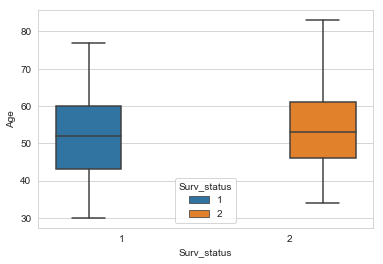

In [24]:
# Box plots

splot = sns.boxplot(x='Surv_status',y='Age', hue="Surv_status", data=haberman)
plt.show()

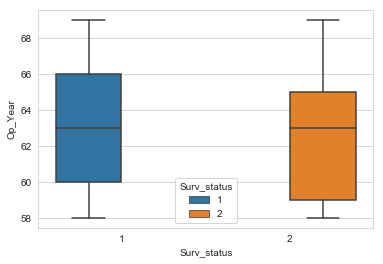

In [25]:
sns.boxplot(x='Surv_status',y='Op_Year', hue="Surv_status", data=haberman)
plt.show()

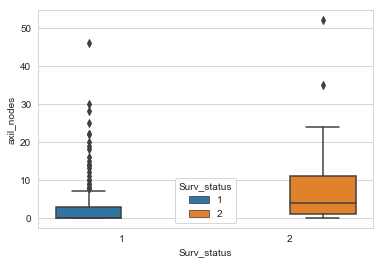

In [26]:
sns.boxplot(x='Surv_status',y='axil_nodes', hue="Surv_status", data=haberman)
plt.show()

**Conclusions** :
1. The probability of box plot is the same for Surv_status 1 and Surv_status 2
2. A clear model cannot be established from box plots.

# Violin plots

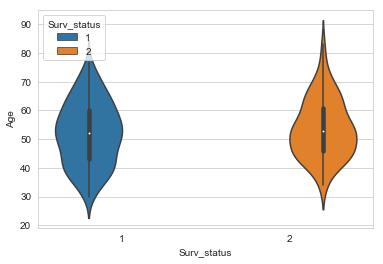

In [27]:
# Violin plots

sns.violinplot(x="Surv_status", y="Age", hue="Surv_status", data=haberman, size=8)
plt.show()

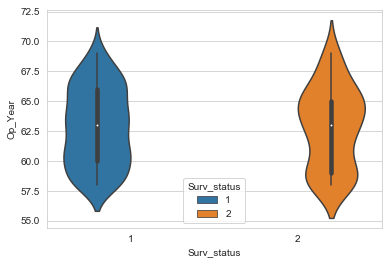

In [28]:
sns.violinplot(x="Surv_status", y="Op_Year", hue="Surv_status", data=haberman, size=8)
plt.show()

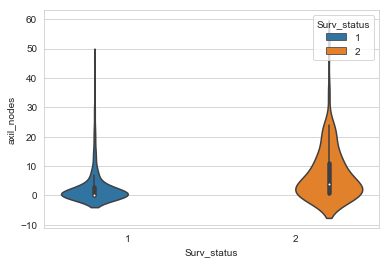

In [29]:
sns.violinplot(x="Surv_status", y="axil_nodes", hue="Surv_status",  data=haberman, size=8)
plt.show()

**Conclusions** :
1. The probability of box plot is the same for Surv_status 1 and Surv_status 2
2. A clear model cannot be established from violin plots.

# Multivariate probability density, contour plot.

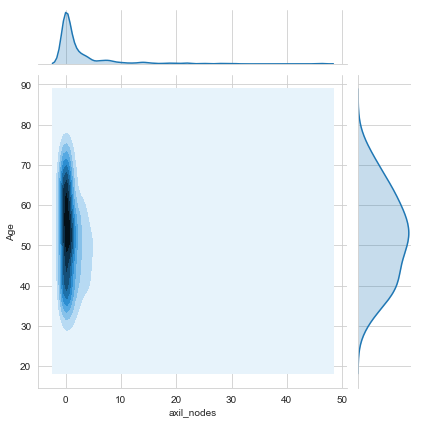

In [30]:
# Joint plots

sns.jointplot(x="axil_nodes", y="Age", data=haberman_status1, kind="kde");
plt.show();

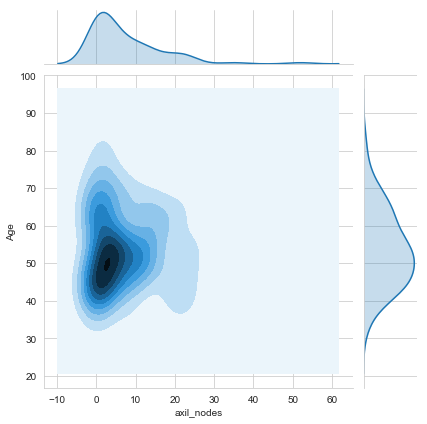

In [31]:
sns.jointplot(x="axil_nodes", y="Age", data=haberman_status2, kind="kde");
plt.show();

**Conclusions** :
1. Although all plotting techniques have been employed, data is too ambigious to determine a model based on if-else
2. More domain knowledge is required to construct a model